In [109]:
import pandas as pd
import numpy as np
from random import gauss, uniform
import matplotlib.pyplot as plt
%matplotlib inline

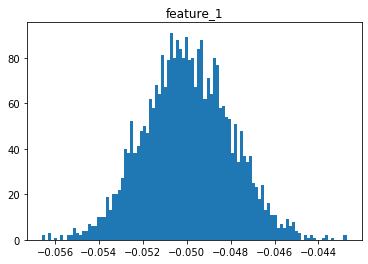

In [21]:
feature_1 = np.random.normal(loc = -0.05, scale = 0.002, size = 3000)
plt.hist(feature_1, bins = 100)
plt.title('feature_1');

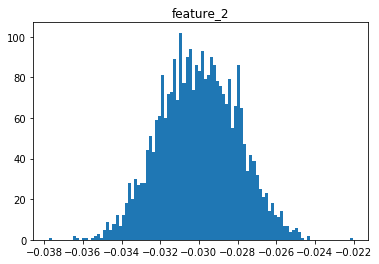

In [22]:
feature_2 = np.random.normal(loc = -0.03, scale = 0.002, size = 3000)
plt.hist(feature_2, bins = 100)
plt.title('feature_2');

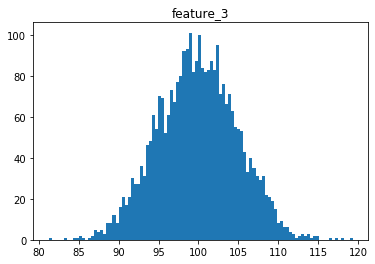

In [23]:
feature_3 = np.random.normal(loc = 100, scale = 5, size = 3000)
plt.hist(feature_3, bins = 100)
plt.title('feature_3');

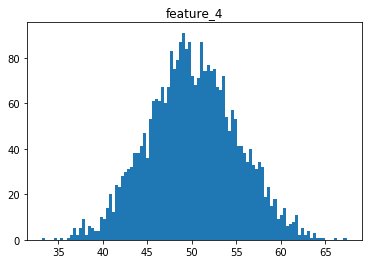

In [24]:
feature_4 = np.random.normal(loc = 50, scale = 5, size = 3000)
plt.hist(feature_4, bins = 100)
plt.title('feature_4');

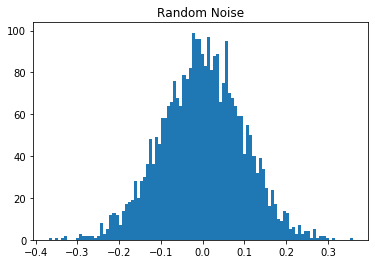

In [138]:
random_noise = [gauss(0, 0.1) for i in range(3000)]
plt.hist(random_noise, bins = 100)
plt.title('Random Noise');

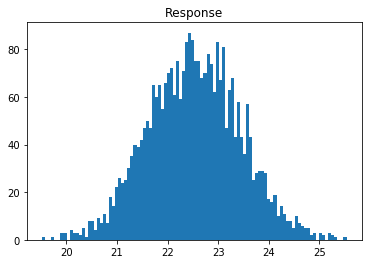

In [139]:
response = (250) * feature_1 + (-250) * feature_2 + (-0.1) * feature_3 + 0.05 * feature_4 + random_noise + 35

plt.hist(response, bins = 100)
plt.title('Response');

In [97]:
# Verify if synthetic data is calculated correctly

In [179]:
df = pd.DataFrame({'feature_1':feature_1, 'feature_2':feature_2, 'feature_3':feature_3, 
                   'feature_4':feature_4, 'response':response})
df.head()

,feature_1,feature_2,feature_3,feature_4,response
0,-0.048787,-0.030227,99.431281,50.331241,22.748267
1,-0.047730,-0.029797,104.286082,46.618789,22.376477
2,-0.052320,-0.028783,100.232124,46.554226,21.543645
3,-0.046514,-0.030398,98.366461,56.231097,23.775924
4,-0.049888,-0.029798,97.476779,51.192905,22.773968


In [180]:
X = df.iloc[:,:-1]
y = df['response']

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [182]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-4, -0.5, 30)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0, max_iter=10000)

In [183]:
lasso_cv.fit(X_train, y_train)
lasso_cv.coef_

array([ 2.26552776e+02, -2.27551045e+02, -9.97378083e-02,  4.99808246e-02])

In [184]:
lasso_cv.intercept_

34.47670205235267

In [185]:
from sklearn.metrics import mean_squared_error
y_pred = lasso_cv.predict(X_test)
mean_squared_error(y_pred, y_test)**0.5

0.1211759160918245

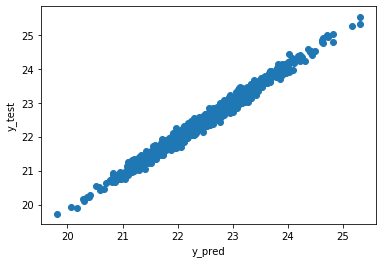

In [186]:
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test');

In [187]:
# Coefficients and intercept are pretty close to the design values
# RMSE matches the std dev of the random_feature added to the response

In [188]:
# Add other random generated features
feature_list = []
for i in range(0, 196):
    feature = np.random.normal(loc = uniform(-150.0, 150.0), scale = uniform(0.1, 30), size = 3000)
    feature_list.append(feature)

In [189]:
feature_list[0]

array([-79.13268835, -96.85771672, -90.68794383, ..., -98.74539335,
       -94.47535492, -97.98665911])

In [190]:
random_features = pd.DataFrame(np.transpose(np.array(feature_list)))
random_features.head()

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,-79.132688,-70.743009,-50.326526,-75.562415,-129.011347,84.101600,15.808480,135.752212,-113.294123,-26.063516,...,46.417463,0.865370,-130.385573,7.519119,148.354409,-8.256604,-137.177789,-131.188389,-66.765282,-128.426732
1,-96.857717,-80.471254,-55.852945,-108.263794,-128.607775,83.016697,12.619346,145.418419,-133.991016,-74.811449,...,50.644919,1.198262,-112.737197,5.223670,155.123392,-18.721414,-148.345367,-135.599336,-73.139134,-134.520020
2,-90.687944,-73.402582,-61.482205,-87.103999,-128.580601,83.190282,7.633332,122.634232,-125.698838,-53.182742,...,0.721356,7.467808,-108.466404,5.854620,138.470080,-27.730642,-157.970181,-130.895021,-58.637316,-141.446176
3,-95.417959,-82.169228,-73.746902,-62.237184,-126.959202,83.362011,-35.725121,164.934122,-148.986925,-66.768500,...,49.784404,1.739703,-145.258919,4.134196,123.097802,-39.252460,-166.638827,-130.560585,-84.886453,-156.288719
4,-92.497965,-66.265405,-71.684465,-75.816969,-131.060727,83.535673,-32.647518,117.381609,-105.978452,-49.585224,...,46.713954,0.170007,-128.640901,9.357563,135.974168,-48.024520,-126.920677,-132.468148,-78.998843,-132.473212


In [191]:
random_features.columns = ["feature_{}".format(col+5) for col in random_features.columns]

In [192]:
random_features.head()

,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,...,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200
0,-79.132688,-70.743009,-50.326526,-75.562415,-129.011347,84.101600,15.808480,135.752212,-113.294123,-26.063516,...,46.417463,0.865370,-130.385573,7.519119,148.354409,-8.256604,-137.177789,-131.188389,-66.765282,-128.426732
1,-96.857717,-80.471254,-55.852945,-108.263794,-128.607775,83.016697,12.619346,145.418419,-133.991016,-74.811449,...,50.644919,1.198262,-112.737197,5.223670,155.123392,-18.721414,-148.345367,-135.599336,-73.139134,-134.520020
2,-90.687944,-73.402582,-61.482205,-87.103999,-128.580601,83.190282,7.633332,122.634232,-125.698838,-53.182742,...,0.721356,7.467808,-108.466404,5.854620,138.470080,-27.730642,-157.970181,-130.895021,-58.637316,-141.446176
3,-95.417959,-82.169228,-73.746902,-62.237184,-126.959202,83.362011,-35.725121,164.934122,-148.986925,-66.768500,...,49.784404,1.739703,-145.258919,4.134196,123.097802,-39.252460,-166.638827,-130.560585,-84.886453,-156.288719
4,-92.497965,-66.265405,-71.684465,-75.816969,-131.060727,83.535673,-32.647518,117.381609,-105.978452,-49.585224,...,46.713954,0.170007,-128.640901,9.357563,135.974168,-48.024520,-126.920677,-132.468148,-78.998843,-132.473212


In [280]:
completed_df = df.merge(random_features, left_index=True, right_index=True)
completed_df = completed_df[[col for col in completed_df if col not in ['response']] + ['response']]

In [281]:
completed_df.shape

(3000, 201)

In [282]:
completed_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,response
0,-0.048787,-0.030227,99.431281,50.331241,-79.132688,-70.743009,-50.326526,-75.562415,-129.011347,84.101600,...,0.865370,-130.385573,7.519119,148.354409,-8.256604,-137.177789,-131.188389,-66.765282,-128.426732,22.748267
1,-0.047730,-0.029797,104.286082,46.618789,-96.857717,-80.471254,-55.852945,-108.263794,-128.607775,83.016697,...,1.198262,-112.737197,5.223670,155.123392,-18.721414,-148.345367,-135.599336,-73.139134,-134.520020,22.376477
2,-0.052320,-0.028783,100.232124,46.554226,-90.687944,-73.402582,-61.482205,-87.103999,-128.580601,83.190282,...,7.467808,-108.466404,5.854620,138.470080,-27.730642,-157.970181,-130.895021,-58.637316,-141.446176,21.543645
3,-0.046514,-0.030398,98.366461,56.231097,-95.417959,-82.169228,-73.746902,-62.237184,-126.959202,83.362011,...,1.739703,-145.258919,4.134196,123.097802,-39.252460,-166.638827,-130.560585,-84.886453,-156.288719,23.775924
4,-0.049888,-0.029798,97.476779,51.192905,-92.497965,-66.265405,-71.684465,-75.816969,-131.060727,83.535673,...,0.170007,-128.640901,9.357563,135.974168,-48.024520,-126.920677,-132.468148,-78.998843,-132.473212,22.773968


In [283]:
X = completed_df.iloc[:,:-1]
y = completed_df['response']

In [343]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LassoCV
alphas = np.logspace(-4, -0.05, 30)
lasso_cv = LassoCV(alphas=alphas, cv=10, random_state=0, max_iter=10000)

In [361]:
lasso_cv.fit(X_train_scaled, y_train)
len(lasso_cv.coef_[abs(lasso_cv.coef_) > 0.1])

4

In [362]:
lasso_cv.alpha_

0.00047977154073813774

In [363]:
lasso_cv.intercept_

23.875454076080914

In [378]:
coef = pd.DataFrame(lasso_cv.coef_, columns=['coefficient'])
coef.head()

,coefficient
0,3.439327
1,-3.935910
2,-3.783804
3,1.690182
4,-0.000000


RMSE: 0.1026948860181238


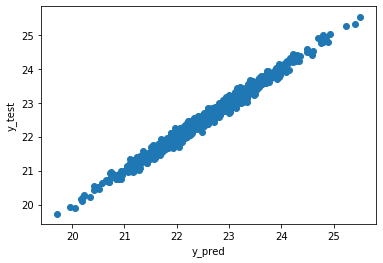

In [376]:
from sklearn.metrics import mean_squared_error
y_pred = lasso_cv.predict(X_test_scaled)
print('RMSE: {}'.format(mean_squared_error(y_pred, y_test)**0.5))

plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test');